In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns.
application_df=application_df.drop(columns=["EIN","NAME","USE_CASE","STATUS","SPECIAL_CONSIDERATIONS"])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,0,5000,1
1,T3,Independent,C2000,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,Association,0,5000,0
3,T3,CompanySponsored,C2000,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,Association,0,5000,0
34295,T4,CompanySponsored,C3000,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Association,0,5000,0
34297,T5,Independent,C3000,Association,0,5000,1


In [3]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts=application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

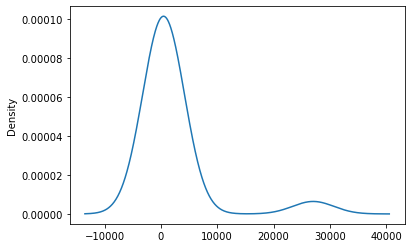

In [4]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [5]:
# Determine which values to replace less than 1000
replace_application = list(application_type_counts[application_type_counts < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

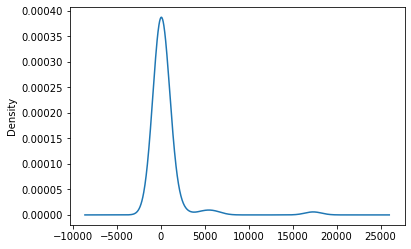

In [7]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [8]:
# Determine which values to replace less than 1000
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Look at ASK_AMT value counts for binning
ASK_AMT_counts=application_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

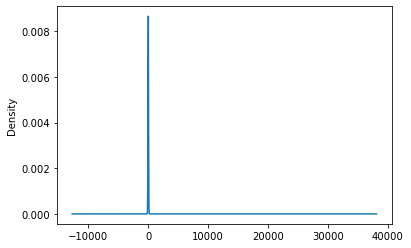

In [10]:
# Visualize the value counts of ASK_AMT
ASK_AMT_counts.plot.density()

In [11]:
replace_ASK_AMT = list(ASK_AMT_counts[ASK_AMT_counts < 5].index)
replace_ASK_AMT

[10478,
 15583,
 63981,
 6725,
 7003,
 42072,
 5731,
 46327,
 39122,
 11839,
 6742,
 21264,
 86039,
 73987,
 9537,
 29130,
 206725,
 13420,
 136341,
 80599,
 12584,
 7686,
 20834,
 17614,
 31453,
 42962,
 26432,
 18063,
 23202,
 6960,
 5297,
 21389,
 246851,
 94253,
 6000,
 146824,
 12753,
 15039,
 39168,
 47129,
 10070,
 43814,
 34875,
 5706,
 6279,
 17010,
 184668,
 5470,
 54024,
 20150,
 90834,
 120158,
 6035,
 42178,
 13681,
 13831,
 27073,
 64471,
 5175,
 22579,
 83211,
 35734,
 5170,
 36683,
 51366,
 50890,
 34995,
 32141,
 6920,
 8632,
 83827,
 67367,
 59647,
 6398,
 15722,
 31549,
 13898,
 238933,
 7187,
 16071,
 13499,
 24459,
 27441,
 14000,
 18985,
 63520,
 5179,
 14765,
 201112,
 350000,
 32507,
 8746,
 22472,
 7049,
 6405,
 27944,
 34792,
 57588,
 73627,
 32807,
 16200,
 12238,
 64093,
 41894,
 57957,
 34538,
 9413,
 57689,
 15372,
 61397,
 1427468,
 24105,
 5130,
 5548,
 9323,
 16435,
 19704,
 16482,
 56135,
 37390,
 60000,
 195661,
 18826,
 6010,
 9255,
 7287,
 210432,
 

In [12]:
# Determine which values to replace less than 5
replace_ASK_AMT = list(ASK_AMT_counts[ASK_AMT_counts < 5].index)

# Replace in dataframe
for amt in replace_ASK_AMT:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(amt, '>5000')
    
ask_values_0 = application_df['ASK_AMT'][application_df['ASK_AMT'] == 5000]
for amt in ask_values_0:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(amt, '5000')

# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000     25398
>5000     8901
Name: ASK_AMT, dtype: int64

In [13]:
# Look at AFFILIATION value counts for binning
AFFILIATION_counts=application_df.AFFILIATION.value_counts()

# Determine which values to replace less than 1000
replace_AFFILIATION = list(AFFILIATION_counts[AFFILIATION_counts < 1000].index)

# Replace in dataframe
for aff in replace_AFFILIATION:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()


Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [14]:
# Look at ORGANIZATION value counts for binning
ORGANIZATION_counts=application_df.ORGANIZATION.value_counts()

# Determine which values to replace less than 1000
replace_ORGANIZATION = list(ORGANIZATION_counts[ORGANIZATION_counts < 1000].index)

# Replace in dataframe
for org in replace_ORGANIZATION:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [15]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat 

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'ORGANIZATION',
 'INCOME_AMT',
 'ASK_AMT']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_5000,ASK_AMT_>5000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df


C:\Users\aditis\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_5000,ASK_AMT_>5000
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\aditis\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hiZdden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               3720      
                                                                 
 dense_1 (Dense)             (None, 80)                9680      
                                                                 
 dense_2 (Dense)             (None, 50)                4050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17,501
Trainable params: 17,501
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every epoch
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5712 - accuracy: 0.7213
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5610 - accuracy: 0.7266
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7261
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5577 - accuracy: 0.7279
Epoch 5/100
784/804 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7273
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7270
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7275
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7292
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7288
Epoch 9/100
804/804 [==============================] -

804/804 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7335
Epoch 64/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7338
Epoch 65/100
786/804 [============================>.] - ETA: 0s - loss: 0.5455 - accuracy: 0.7330
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7334
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy: 0.7338
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5452 - accuracy: 0.7338
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.7337
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5449 - accuracy: 0.7340
Epoch 70/100
785/804 [============================>.] - ETA: 0s - loss: 0.5445 - accuracy: 0.7344
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5762 - accuracy: 0.7207 - 454ms/epoch - 2ms/step
Loss: 0.576161801815033, Accuracy: 0.7206997275352478


In [24]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5.h5")